In [5]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

In [6]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. All changes under this directory will be kept even after reset. Please clean unnecessary files in time to speed up environment loading.
!ls /home/aistudio/work

In [7]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, you need to use the persistence path as the following:
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

mkdir: cannot create directory ‘/home/aistudio/external-libraries’: File exists
Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple/
  Using cached https://mirrors.tuna.tsinghua.edu.cn/pypi/web/packages/66/25/ff030e2437265616a1e9b25ccc864e0371a0bc3adb7c5a404fd661c6f4f6/beautifulsoup4-4.9.1-py3-none-any.whl
  Using cached https://mirrors.tuna.tsinghua.edu.cn/pypi/web/packages/6f/8f/457f4a5390eeae1cc3aeab89deb7724c965be841ffca6cfca9197482e470/soupsieve-2.0.1-py3-none-any.whl


In [8]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可:
# Also add the following code, so that every time the environment (kernel) starts, just run the following code:
import sys
sys.path.append('/home/aistudio/external-libraries')

### 查看表头

In [17]:
import pandas as pd
# 读取前5行看下效果
data1 = pd.read_csv('pangguangjieshi.csv',nrows=5) #读入数据
# 读取全部数据
data = pd.read_csv('pangguangjieshi.csv') #读入数据
# print(data1.columns)
print(data1)

   像素       波数        波长   相对强度       暗电流
0   0 -189.283  1042.994 -60539     65535
1   1 -182.045  1043.782  34040      4311
2   2 -174.816  1044.571  33147      4824
3   3 -167.597  1045.359  34169      2973
4   4 -160.388  1046.147  32191      4454


### 提取第二列和第四列

In [18]:
data_list = pd.DataFrame(data,columns=(['波数','相对强度']))#将csv文件中flow列中的数据保存到列表中

In [19]:
# print(data_list)

           波数   相对强度
0    -189.283 -60539
1    -182.045  34040
2    -174.816  33147
3    -167.597  34169
4    -160.388  32191
5    -153.189  32585
6    -146.000  31011
7    -138.821  29991
8    -131.652  27636
9    -124.493  27407
10   -117.343  24388
11   -110.204  24012
12   -103.074  22398
13    -95.954  22329
14    -88.844  20370
15    -81.744  22736
16    -74.653  21195
17    -67.572  22911
18    -60.501  25451
19    -53.439  27593
20    -46.388  30992
21    -39.345  40600
22    -32.313  59478
23    -25.290  61069
24    -18.277  61194
25    -11.273  62522
26     -4.279  62528
27      2.706  60631
28      9.681  60980
29     16.647  60515
..        ...    ...
482  2417.106    367
483  2421.119    453
484  2425.127    399
485  2429.130    524
486  2433.130    489
487  2437.125    445
488  2441.115    417
489  2445.102    351
490  2449.084    470
491  2453.061    547
492  2457.035    475
493  2461.004    417
494  2464.968    452
495  2468.929    531
496  2472.885    424
497  2476.837

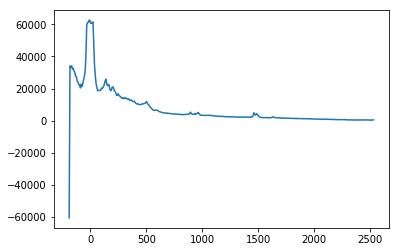

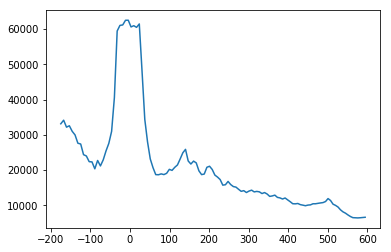

In [129]:
import matplotlib.pyplot as plt

x = pd.DataFrame(data,columns=(['波数']))#将csv文件中flow列中的数据保存到列表中
y = pd.DataFrame(data,columns=(['相对强度']))#将csv文件中flow列中的数据保存到列表中
plt.plot(x,y)
plt.show()

new_data_list = data.loc[(data_list['波数']>-180)&(data_list['波数']<600)]
new_data_list = pd.DataFrame(new_data_list,columns=(['波数','相对强度']))
# print(new_data_list)
x_o = pd.DataFrame(new_data_list,columns=(['波数']))#将csv文件中flow列中的数据保存到列表中
y_o = pd.DataFrame(new_data_list,columns=(['相对强度']))#将csv文件中flow列中的数据保存到列表中
plt.plot(x_o,y_o)
plt.show()

In [91]:
print(new_data_list.shape)
# print(new_data_list)
import os 
file = open("123.txt",'w')
for i in range (116):
    num = str(new_data_list.iat[i,0])+'  '+str(new_data_list.iat[i,1])
    file.write(num)
    # file.write(str(new_data_list.iat[i,1]))
    file.write('\n')

file.close()

(116, 2)


In [56]:
print(new_data_list.iat[0,1])

33147


In [100]:
min_num_x = []
min_num_y = []
for i in range (115):
    if i > 0:
        if ((new_data_list.iat[i,1]<new_data_list.iat[i-1,1]) & (new_data_list.iat[i,1]<new_data_list.iat[i+1,1])):
            min_num_x.append(new_data_list.iat[i,0])
            min_num_y.append(new_data_list.iat[i,1])

In [101]:
print(min_num_x,min_num_y)

[-160.388, -88.844, -74.653, 2.7060000000000004, 16.647000000000002, 72.032, 85.78399999999999, 106.344, 153.99200000000002, 181.018, 234.637, 281.085, 294.277, 313.998, 333.64099999999996, 353.205, 385.64099999999996, 417.86300000000006, 443.48800000000006, 575.8380000000001] [32191, 20370, 21195, 60631, 60515, 18683, 18736, 19924, 21729, 18727, 15740, 13984, 13649, 13824, 13352, 12546, 11802, 10433, 9899, 6439]


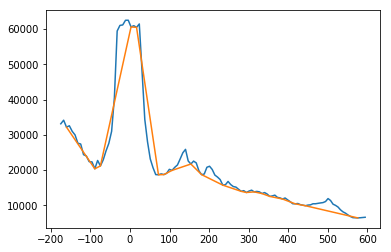

In [130]:
plt.plot(x_o,y_o)
plt.plot(min_num_x,min_num_y)
plt.show()

In [134]:
print(len(min_num_x) ,len(min_num_y))

20 20


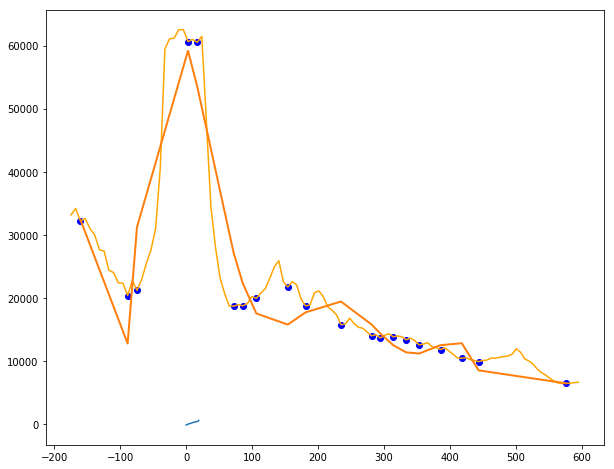

In [140]:
import numpy as np
import math
import matplotlib.pyplot as plt

M=9#多项式阶数

x = np.array(min_num_x)
y_noise=np.array(min_num_y)

#绿色曲线显示x - y，散点显示x - y_noise
plt.figure(figsize=(10,8))
plt.title("")
plt.plot(x,y_noise,'bo')
 
X=x
for i in range(2,M+1):
         X = np.column_stack((X, pow(x,i)))

#add 1 on the first column of X, now X's shape is (SAMPLE_NUM*(M+1))
X = np.insert(X,0,[1],1)

#calculate W, W's shape is ((M+1)*1)#
W=np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y_noise)#have no regularization
# W=np.linalg.inv((X.T.dot(X))+np.exp(-8) * np.eye(M+1)).dot(X.T).dot(y_noise)#introduce regularization
y_estimate=X.dot(W)

#红色曲线显示x - y_estimate
# plt.plot(x_o,y_o,label = '12')
plt.plot(x_o,y_o,color="orange")
plt.plot(min_num_x)
plt.plot(x,y_estimate,linewidth=2)
plt.show()  


请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 